# SVM Kernels Implementation

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
x = np.linspace(-0.5,0.5,100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [18]:
x1 = np.linspace(-0.5,0.5,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,- y1])
x1 = np.hstack([x1,- x1])

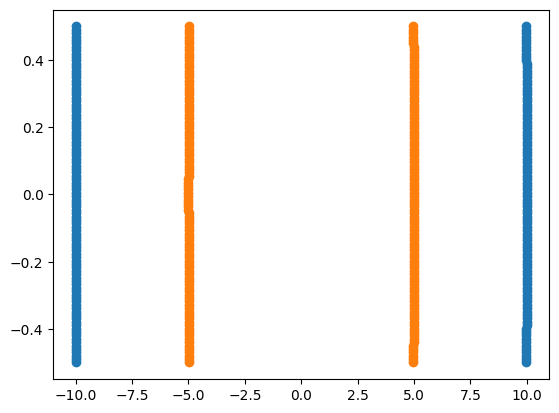

In [19]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [20]:
x

array([-0.5       , -0.48989899, -0.47979798, -0.46969697, -0.45959596,
       -0.44949495, -0.43939394, -0.42929293, -0.41919192, -0.40909091,
       -0.3989899 , -0.38888889, -0.37878788, -0.36868687, -0.35858586,
       -0.34848485, -0.33838384, -0.32828283, -0.31818182, -0.30808081,
       -0.2979798 , -0.28787879, -0.27777778, -0.26767677, -0.25757576,
       -0.24747475, -0.23737374, -0.22727273, -0.21717172, -0.20707071,
       -0.1969697 , -0.18686869, -0.17676768, -0.16666667, -0.15656566,
       -0.14646465, -0.13636364, -0.12626263, -0.11616162, -0.10606061,
       -0.0959596 , -0.08585859, -0.07575758, -0.06565657, -0.05555556,
       -0.04545455, -0.03535354, -0.02525253, -0.01515152, -0.00505051,
        0.00505051,  0.01515152,  0.02525253,  0.03535354,  0.04545455,
        0.05555556,  0.06565657,  0.07575758,  0.08585859,  0.0959596 ,
        0.10606061,  0.11616162,  0.12626263,  0.13636364,  0.14646465,
        0.15656566,  0.16666667,  0.17676768,  0.18686869,  0.19

In [21]:
y

array([ 9.98749218,  9.98799274,  9.98848306,  9.98896315,  9.98943299,
        9.98989261,  9.99034198,  9.99078113,  9.99121004,  9.99162873,
        9.99203718,  9.99243541,  9.99282341,  9.99320119,  9.99356874,
        9.99392607,  9.99427318,  9.99461007,  9.99493673,  9.99525318,
        9.99555942,  9.99585543,  9.99614123,  9.99641682,  9.99668219,
        9.99693734,  9.99718229,  9.99741702,  9.99764154,  9.99785586,
        9.99805996,  9.99825385,  9.99843754,  9.99861101,  9.99877428,
        9.99892735,  9.9990702 ,  9.99920286,  9.9993253 ,  9.99943754,
        9.99953958,  9.99963141,  9.99971304,  9.99978446,  9.99984568,
        9.99989669,  9.99993751,  9.99996812,  9.99998852,  9.99999872,
        9.99999872,  9.99998852,  9.99996812,  9.99993751,  9.99989669,
        9.99984568,  9.99978446,  9.99971304,  9.99963141,  9.99953958,
        9.99943754,  9.9993253 ,  9.99920286,  9.9990702 ,  9.99892735,
        9.99877428,  9.99861101,  9.99843754,  9.99825385,  9.99

In [22]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['y'] = 1

In [27]:
df = pd.concat([df1, df2], ignore_index=True)

In [28]:
df.head()

,X1,X2,y
0,9.987492,-0.500000,0
1,9.987993,-0.489899,0
2,9.988483,-0.479798,0
3,9.988963,-0.469697,0
4,9.989433,-0.459596,0


In [30]:
#dependent and independent features
X = df.drop('y',axis = 1)

In [32]:
X

,X1,X2
0,9.987492,-0.500000
1,9.987993,-0.489899
2,9.988483,-0.479798
3,9.988963,-0.469697
4,9.989433,-0.459596
...,...,...
395,-4.978832,-0.459596
396,-4.977890,-0.469697
397,-4.976926,-0.479798
398,-4.975942,-0.489899


In [33]:
y = df['y']

In [34]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [37]:
X_train.shape,X_test.shape

((300, 2), (100, 2))

#We need apply Polynomial Kernel

#We need to find components for the polynomial kernel
#x1,x2,x1_square,x2_square,X1*X2

In [44]:
df.columns

Index(['X1', 'X2', 'y', 'X1_square', 'X2_square'], dtype='object')

In [47]:
df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1*X2'] = df['X1'] * df['X2']
df.head()

,X1,X2,y,X1_square,X2_square,X1*X2
0,9.987492,-0.500000,0,99.750000,0.250000,-4.993746
1,9.987993,-0.489899,0,99.759999,0.240001,-4.893108
2,9.988483,-0.479798,0,99.769794,0.230206,-4.792454
3,9.988963,-0.469697,0,99.779385,0.220615,-4.691786
4,9.989433,-0.459596,0,99.788772,0.211228,-4.591103


In [50]:
#independent and dependent features
X = df[['X1','X2','X1_square','X2_square','X1*X2']]
y = df['y']

In [51]:
X

,X1,X2,X1_square,X2_square,X1*X2
0,9.987492,-0.500000,99.750000,0.250000,-4.993746
1,9.987993,-0.489899,99.759999,0.240001,-4.893108
2,9.988483,-0.479798,99.769794,0.230206,-4.792454
3,9.988963,-0.469697,99.779385,0.220615,-4.691786
4,9.989433,-0.459596,99.788772,0.211228,-4.591103
...,...,...,...,...,...
395,-4.978832,-0.459596,24.788772,0.211228,2.288251
396,-4.977890,-0.469697,24.779385,0.220615,2.338100
397,-4.976926,-0.479798,24.769794,0.230206,2.387919
398,-4.975942,-0.489899,24.759999,0.240001,2.437709


In [52]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC()

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [54]:
X_train

,X1,X2,X1_square,X2_square,X1*X2
247,4.999936,-0.025253,24.999362,0.000638,-0.126261
110,-9.992037,0.398990,99.840807,0.159193,-3.986722
16,9.994273,-0.338384,99.885496,0.114504,-3.381901
66,9.998611,0.166667,99.972222,0.027778,1.666435
153,-9.999938,-0.035354,99.998750,0.001250,0.353533
...,...,...,...,...,...
71,9.997642,0.217172,99.952836,0.047164,2.171205
106,-9.990342,0.439394,99.806933,0.193067,-4.389696
270,4.995710,0.207071,24.957122,0.042878,1.034465
348,-4.999977,0.015152,24.999770,0.000230,-0.075757


In [55]:
#plot in 3D
import plotly.express as px

fig = px.scatter_3d(df, x='X1',y='X2',z='X1*X2',color='y')

In [56]:
fig.show()

In [57]:
fig = px.scatter_3d(df, x='X1_square',y='X2_square',z='X1*X2',color='y')
fig.show()

In [58]:
svc = SVC(kernel = 'linear')

In [59]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [61]:
y_pred = svc.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [67]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[52  0]
 [ 0 48]]


In [68]:
print(accuracy_score(y_test,y_pred))

1.0


#I am getting 100percent accuracy so, We manually created the polynomial

In [71]:
svc = SVC(kernel = 'poly')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


##Without manually when we give kernel='poly' it will create x1_square ,x2_square and X1*X2 features inside and give same 100 percent accuracy